In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

Target: 6
Probe: 3

In [76]:
ds1 = pd.read_csv("P3TE/loading_data/data_faces_target_6_10t_29i_l3.csv")
labs1 = np.loadtxt("P3TE/loading_data/labels_faces_target_6_10t_29i_l3.csv",
                   delimiter=',',
                   dtype='int')

In [80]:
ds2 = pd.read_csv("P3Te/loading_data/data_faces_target_6_30t_10i_l3.csv")
labs2 = np.loadtxt("P3TE/loading_data/labels_faces_target_6_30t_10i_l3.csv",
                   delimiter=',', dtype='int')

In [82]:
ds3 = pd.read_csv("P3TE/loading_data/data_faces_target_6_30t_10i_no_click_l3.csv")
labs3 = np.loadtxt("P3TE/loading_data/labels_faces_target_6_30t_10i_no_click_l3.csv",
                   delimiter=',', dtype='int')

In [84]:
rm0102 = ['channel1',
          'channel2',
          'channel3',
          'channel4',
          'channel5',
          'channel6']

In [606]:
all_channels = ['channel1',
                'channel2',
                'channel3',
                'channel4',
                'channel5',
                'channel6',
                'channel7',
                'channel8']

In [507]:
def create_lab_data(ds, labs, msamps, channels):
    # get trigger col
    ds_trigger = ds['Trigger'].values

    # get image events
    img_starts = []
    for i in range(len(ds_trigger) - 1):
        if (ds_trigger[i] == 0) and (ds_trigger[i+1] == 1):
            img_starts.append(i+1)
    img_starts = np.array(img_starts)
    
    # filter signals
    bpfilt = sig.butter(4, (1, 10), 'bandpass', output='sos', fs=250)
    filt_sigs = []
    for i in channels:
        filt_sigs.append(sig.sosfilt(bpfilt, ds[i]))
    filt_sigs = np.array(filt_sigs)

    # get EEG values averaged across channels (without O1 and O2)
    channel_avg_eeg = []
    for i in img_starts:
        img_obs = filt_sigs[:,i:i+msamps].mean(axis=0)
        channel_avg_eeg.append(img_obs)
    channel_avg_eeg = np.array(channel_avg_eeg)

    # create labeled data
    eeg_img_ds = pd.DataFrame(channel_avg_eeg, columns=list(range(msamps)))
    eeg_img_ds['image'] = labs

    return eeg_img_ds

In [439]:
X1 = create_lab_data(ds1, labs1, 250, ['channel5'])
X2 = create_lab_data(ds2, labs2, 250, ['channel5'])
X3 = create_lab_data(ds3, labs3, 250, ['channel5'])

In [553]:
X = pd.concat([X1, X2, X3], ignore_index=True, axis=0)

## Bootstrapping

Davis PTI Short

In [508]:
ds5 = pd.read_csv("P3TE/loading_data/Davis_0_data_PTI_with_click_probe4_target8_(30_trials)(10_images)(500_downTime)(200_flashTime).csv")
labels5 = np.loadtxt("P3TE/loading_data/Davis_0_labels_PTI_with_click_probe4_target8_(30_trials)(10_images)(500_downTime)(200_flashTime).csv",
                     delimiter=',',
                     dtype='int')

In [523]:
X5 = create_lab_data(ds5, labels5, 250, rm0102)
X5_no_img = X5.loc[:, X5.columns != 'image']

Zef PTI short

In [546]:
ds8 = pd.read_csv("P3TE/loading_data/Zef_0_data_PTI_probe0_target5_(30_trials)(10_images)(500_downTime)(200_flashTime)_label0.csv")
labels8 = np.loadtxt("P3TE/loading_data/Zef_0_labels_PTI_probe0_target5_(30_trials)(10_images)(500_downTime)(200_flashTime)_label0.csv",
                     delimiter=',',
                     dtype='int')

In [547]:
X8 = create_lab_data(ds8, labels8, 250, rm0102)

Darren PTI

In [703]:
ds9 = pd.read_csv("P3TE/loading_data/Darren_data_PTI_target5_(8_trials)(60_images)(500_downTime)(200_flashTime).csv")
labels9 = np.loadtxt("P3TE/loading_data/Darren_labels_PTI_target5_(8_trials)(60_images)(500_downTime)(200_flashTime).csv",
                     delimiter=',',
                     dtype='int')

In [704]:
X9 = create_lab_data(ds9, labels9, 250, all_channels)

In [636]:
test_prb = X9.iloc[np.where(X9['image'] == 3)]

In [692]:
np.where(X9['image'] == 3)[0].size

40

In [693]:
test_target = X9.iloc[np.where(X9['image'] == 5)]
np.where(X9['image'] == 5)[0].size

40

In [695]:
np.concatenate((np.where(X9['image'] == 3), np.where(X9['image'] == 5)))

array([[  0,   5,  39,  47,  51,  78,  89, 102, 103, 117, 142, 144, 148,
        171, 173, 184, 188, 191, 239, 245, 262, 270, 350, 367, 396, 429,
        436, 438, 447, 448, 467, 480, 517, 555, 561, 599, 627, 635, 676,
        766],
       [ 18,  22,  71, 135, 164, 175, 213, 251, 252, 281, 288, 295, 313,
        349, 351, 354, 359, 381, 390, 405, 440, 475, 481, 487, 492, 494,
        508, 511, 519, 560, 562, 579, 598, 630, 639, 663, 714, 716, 732,
        799]], dtype=int64)

In [651]:
binds = np.concatenate((np.where(X9['image'] == 3)[0], np.where(X9['image'] == 5)[0]))

array([  0,   5,  39,  47,  51,  78,  89, 102, 103, 117, 142, 144, 148,
       171, 173, 184, 188, 191, 239, 245, 262, 270, 350, 367, 396, 429,
       436, 438, 447, 448, 467, 480, 517, 555, 561, 599, 627, 635, 676,
       766,  18,  22,  71, 135, 164, 175, 213, 251, 252, 281, 288, 295,
       313, 349, 351, 354, 359, 381, 390, 405, 440, 475, 481, 487, 492,
       494, 508, 511, 519, 560, 562, 579, 598, 630, 639, 663, 714, 716,
       732, 799], dtype=int64)

In [649]:
irrinds = np.delete(np.arange(800), binds)

### Probe, Test, Irrelevant (PTI) Paradigm

In [698]:
def pti_bcd_test(X, target, suspects, n_iters, n_samples):
    X_eeg = X.loc[:,X.columns != 'image']

    suspect_BIs = {}
    suspect_corrPTs = []
    suspect_corrPIs = []

    for suspect in suspects:
        X_target = X_eeg.iloc[np.where(X['image'] == target)]
        X_test_probe = X_eeg.iloc[np.where(X['image'] == suspect)]

        tp_inds = np.concatenate((np.where(X['image'] == suspect),
                                  np.where(X['image'] == target))).flatten()
        irrelevant_inds = np.delete(np.arange(len(X)),tp_inds)
        X_irr = X_eeg.iloc[irrelevant_inds]

        corrPTs = []
        corrPIs = []

        bootstrap_index = 0
        for i in range(n_iters):
            target_inds = np.random.choice(np.arange(len(X_target)), n_samples, replace=False)
            probe_inds = np.random.choice(np.arange(len(X_test_probe)), n_samples, replace=False)
            irr_inds = np.random.choice(np.arange(len(X_irr)), n_samples, replace=False)

            X_t_samp = X_target.iloc[target_inds] # random sample of targets
            X_p_samp = X_test_probe.iloc[probe_inds] # random sample of test probes
            X_i_samp = X_irr.iloc[irr_inds] # random sample of irrelevant subjects

            X_samp_total = pd.concat([X_t_samp, X_p_samp, X_i_samp],
                                      ignore_index=True,
                                      axis=0)
            X_samp_total_bar = X_samp_total.mean(axis=0)

            X_t_bar = X_t_samp.mean(axis=0)
            X_p_bar = X_p_samp.mean(axis=0)
            X_i_bar = X_i_samp.mean(axis=0)

            corr_dc_PT = np.corrcoef(X_p_bar - X_samp_total_bar, X_t_bar - X_samp_total_bar)[0,1]
            corr_dc_PI = np.corrcoef(X_p_bar - X_samp_total_bar, X_i_bar - X_samp_total_bar)[0,1]

            corrPTs.append(corr_dc_PT)
            corrPIs.append(corr_dc_PI)

            bootstrap_index += (corr_dc_PT > corr_dc_PI)
        
        suspect_BIs[suspect] = bootstrap_index / n_iters
        suspect_corrPTs.append(corrPTs)
        suspect_corrPIs.append(corrPIs)

        #print(f'Image {suspect} BI positive proportion: {bootstrap_index / n_iters}')

    guess = list(suspect_BIs.keys())[np.argmax(list(suspect_BIs.values()))]
    
    X_target = X_eeg.iloc[np.where(X['image'] == target)]
    X_probe = X_eeg.iloc[np.where(X['image'] == guess)]

    irr_inds = np.concatenate((np.where(X['image'] == target),
                               np.where(X['image'] == guess))).flatten()

    X_irr = X_eeg.iloc[irr_inds]

    plt.plot(X_target.mean(axis=0), label='Target')
    plt.plot(X_probe.mean(axis=0), label='Guessed Probe')
    plt.plot(X_irr.mean(axis=0), label='Irrelevant')
    plt.legend()

    print(f'Guess: Image {guess}')
    print(suspect_BIs)

Guess: Image 6
{0: 0.17, 1: 0.3, 2: 0.63, 4: 0.29, 5: 0.35, 6: 0.82, 7: 0.3, 8: 0.21}


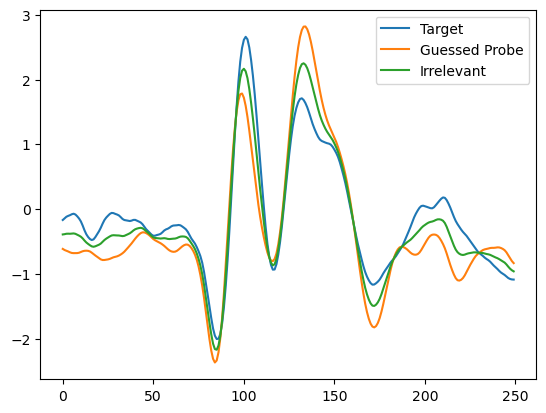

In [699]:
test_targets = [0, 1, 2, 4, 5, 6, 7, 8]
pti_bcd_test(X, target=3, suspects=test_targets, n_iters=100, n_samples=50) # steven long, probe=6

Guess: Image 4
{0: 0.065, 1: 0.07, 2: 0.145, 3: 0.015, 4: 0.34, 5: 0.055, 6: 0.035, 7: 0.08, 9: 0.105}


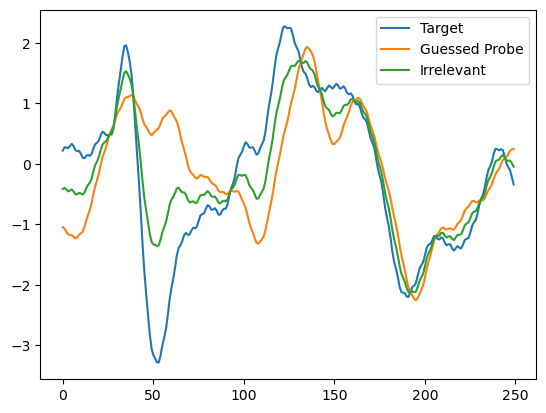

In [700]:
test_targets = [0, 1, 2, 3, 4, 5, 6, 7, 9]
pti_bcd_test(X5, target=8, suspects=test_targets, n_iters=200, n_samples=15) # davis short, probe=4

Guess: Image 0
{0: 0.234, 1: 0.03, 2: 0.058, 3: 0.024, 4: 0.036, 6: 0.192, 7: 0.056, 8: 0.078, 9: 0.044}


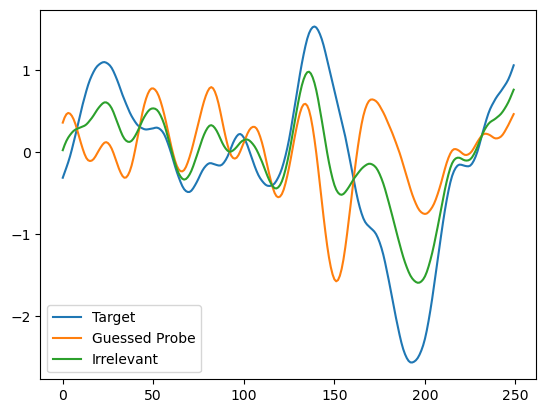

In [701]:
test_targets = [0, 1, 2, 3, 4, 6, 7, 8, 9]
pti_bcd_test(X8, target=5, suspects=test_targets, n_iters=500, n_samples=10) # zef short, probe=0

Guess: Image 1
{0: 0.125, 1: 0.6, 2: 0.49, 3: 0.225, 4: 0.04, 6: 0.155, 7: 0.46, 8: 0.03, 9: 0.025}


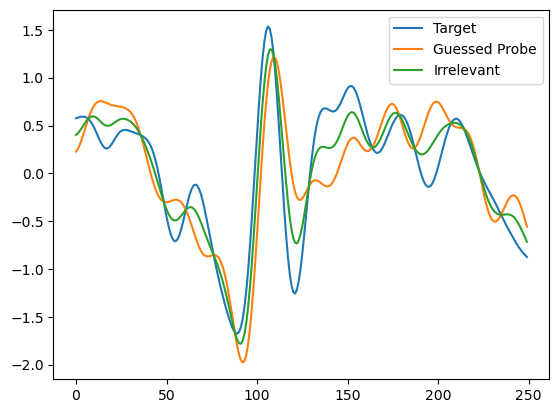

In [705]:
#test_targets = np.delete(np.arange(60), 5)
test_targets = [0, 1, 2, 3, 4, 6, 7, 8, 9]
pti_bcd_test(X9, target=5, suspects=test_targets, n_iters=200, n_samples=25)

### Testing BCD

In [489]:
# DO NOT CHANGE - Steven PTI
test_targets = [0, 1, 2, 4, 5, 6, 7, 8]
corrPTs = []
corrPIs = []

for j in test_targets:
    X_target = X.iloc[np.where(X['image'] == 3)]
    X_probe = X.iloc[np.where(X['image'] == j)]

    tester = np.arange(len(X))
    tps = np.concatenate((np.where(X['image'] == j), np.where(X['image'] == 3))).flatten()
    xirr_inds = np.delete(tester, tps)
    X_irr = X.iloc[xirr_inds]

    bootstrap_index = 0
    for i in range(100):
        target_inds = np.random.choice(np.arange(len(X_target)), 50, replace=False)
        probe_inds = np.random.choice(np.arange(len(X_probe)), 50, replace=False)
        irr_inds = np.random.choice(np.arange(len(X_irr)), 50, replace=False)

        xtd = X_target.loc[:,X_target.columns != 'image']
        xpd = X_probe.loc[:,X_probe.columns != 'image']
        xid = X_irr.loc[:,X_irr.columns != 'image']

        Xtsamp = xtd.iloc[target_inds]
        Xpsamp = xpd.iloc[probe_inds]
        Xisamp = xid.iloc[irr_inds]

        Xtot = pd.concat([Xtsamp, Xpsamp, Xisamp], ignore_index=True, axis=0)
        xtotbar = Xtot.mean(axis=0)

        xtargetbar_dc = Xtsamp.mean(axis=0) - xtotbar
        xprobebar_dc = Xpsamp.mean(axis=0) - xtotbar
        xirrbar_dc = Xisamp.mean(axis=0) - xtotbar

        dc_corr_PT = np.corrcoef(xprobebar_dc, xtargetbar_dc)[0,1]
        dc_corr_PI = np.corrcoef(xprobebar_dc, xirrbar_dc)[0,1]

        if j == 6:
            corrPTs.append(dc_corr_PT)
            corrPIs.append(dc_corr_PI)

        bootstrap_index += (dc_corr_PT > dc_corr_PI)

    print(j, bootstrap_index)

0 6
1 27
2 60
4 25
5 29
6 70
7 28
8 18


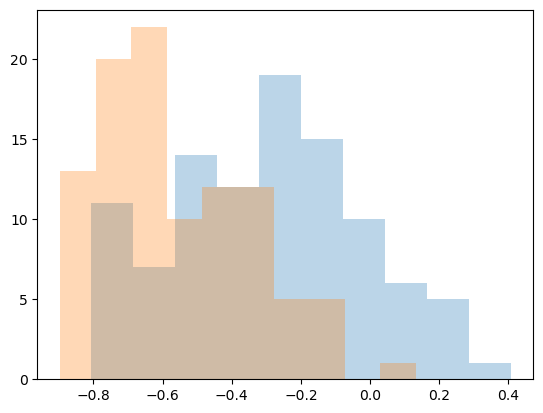

In [490]:
plt.hist(corrPTs, alpha=0.3)
plt.hist(corrPIs, alpha=0.3)
plt.show()

In [535]:
# DO NOT CHANGE - Davis PTI

test_targets = [0, 1, 2, 3, 4, 5, 6, 7, 9]
corrPTs = []
corrPIs = []

for j in test_targets:
    X_target = X5.iloc[np.where(X5['image'] == 8)]
    X_probe = X5.iloc[np.where(X5['image'] == j)]

    tester = np.arange(len(X5))
    tps = np.concatenate((np.where(X5['image'] == j), np.where(X5['image'] == 8))).flatten()
    xirr_inds = np.delete(tester, tps)
    X_irr = X5.iloc[xirr_inds]

    bootstrap_index = 0
    for i in range(500):
        target_inds = np.random.choice(np.arange(len(X_target)), 10, replace=False)
        probe_inds = np.random.choice(np.arange(len(X_probe)), 10, replace=False)
        irr_inds = np.random.choice(np.arange(len(X_irr)), 10, replace=False)

        xtd = X_target.loc[:,X_target.columns != 'image']
        xpd = X_probe.loc[:,X_probe.columns != 'image']
        xid = X_irr.loc[:,X_irr.columns != 'image']

        Xtsamp = xtd.iloc[target_inds]
        Xpsamp = xpd.iloc[probe_inds]
        Xisamp = xid.iloc[irr_inds]

        Xtot = pd.concat([Xtsamp, Xpsamp, Xisamp], ignore_index=True, axis=0)
        xtotbar = Xtot.mean(axis=0)

        xtargetbar_dc = Xtsamp.mean(axis=0) - xtotbar
        xprobebar_dc = Xpsamp.mean(axis=0) - xtotbar
        xirrbar_dc = Xisamp.mean(axis=0) - xtotbar

        dc_corr_PT = np.corrcoef(xprobebar_dc, xtargetbar_dc)[0,1]
        dc_corr_PI = np.corrcoef(xprobebar_dc, xirrbar_dc)[0,1]

        if j == 4:
            corrPTs.append(dc_corr_PT)
            corrPIs.append(dc_corr_PI)


        bootstrap_index += (dc_corr_PT > dc_corr_PI)

    print(j, bootstrap_index)

0 72
1 81
2 121
3 49
4 221
5 51
6 38
7 78
9 77


In [550]:
# DO NOT CHANGE - Zef PTI

test_targets = [0, 1, 2, 3, 4, 6, 7, 8, 9]
corrPTs = []
corrPIs = []

for j in test_targets:
    X_target = X8.iloc[np.where(X8['image'] == 5)]
    X_probe = X8.iloc[np.where(X8['image'] == j)]

    tester = np.arange(len(X8))
    tps = np.concatenate((np.where(X8['image'] == j), np.where(X8['image'] == 5))).flatten()
    xirr_inds = np.delete(tester, tps)
    X_irr = X8.iloc[xirr_inds]

    bootstrap_index = 0
    for i in range(500):
        target_inds = np.random.choice(np.arange(len(X_target)), 10, replace=False)
        probe_inds = np.random.choice(np.arange(len(X_probe)), 10, replace=False)
        irr_inds = np.random.choice(np.arange(len(X_irr)), 10, replace=False)

        xtd = X_target.loc[:,X_target.columns != 'image']
        xpd = X_probe.loc[:,X_probe.columns != 'image']
        xid = X_irr.loc[:,X_irr.columns != 'image']

        Xtsamp = xtd.iloc[target_inds]
        Xpsamp = xpd.iloc[probe_inds]
        Xisamp = xid.iloc[irr_inds]

        Xtot = pd.concat([Xtsamp, Xpsamp, Xisamp], ignore_index=True, axis=0)
        xtotbar = Xtot.mean(axis=0)

        xtargetbar_dc = Xtsamp.mean(axis=0) - xtotbar
        xprobebar_dc = Xpsamp.mean(axis=0) - xtotbar
        xirrbar_dc = Xisamp.mean(axis=0) - xtotbar

        dc_corr_PT = np.corrcoef(xprobebar_dc, xtargetbar_dc)[0,1]
        dc_corr_PI = np.corrcoef(xprobebar_dc, xirrbar_dc)[0,1]

        if j == 0:
            corrPTs.append(dc_corr_PT)
            corrPIs.append(dc_corr_PI)


        bootstrap_index += (dc_corr_PT > dc_corr_PI)

    print(j, bootstrap_index)

0 132
1 11
2 19
3 15
4 15
6 91
7 25
8 34
9 24


(array([  9.,  37.,  84., 109., 107.,  83.,  37.,  19.,  10.,   5.]),
 array([-0.8041273 , -0.67422066, -0.54431403, -0.4144074 , -0.28450076,
        -0.15459413, -0.0246875 ,  0.10521914,  0.23512577,  0.3650324 ,
         0.49493904]),
 <BarContainer object of 10 artists>)

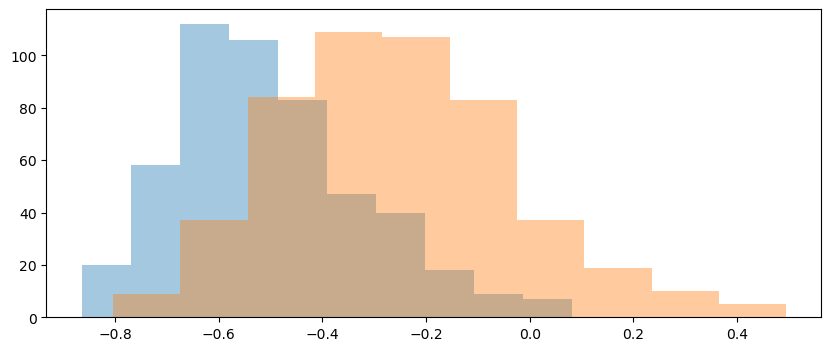

In [551]:
plt.figure(figsize=(10,4))
plt.hist(corrPTs, alpha=0.4)
plt.hist(corrPIs, alpha=0.4)

### One-versus all BCD (no target)

In [347]:
X_no_img = X.loc[:,X.columns != 'image']

In [442]:
test_imgs = [0, 1, 2, 3, 4, 5, 7, 8]
bootstrap_results = []

for ti in test_imgs:
    X_test = X_no_img.iloc[np.where(X['image'] == ti)]
    X_others = X_no_img.iloc[np.where(X['image'] != ti)]

    bootstrap_vals = []

    for i in range(100):
        test_samp_ids = np.random.choice(np.arange(len(X_test)), 50, replace=False)
        other_samps_ids = np.random.choice(np.arange(len(X_others)), 50, replace=False)

        X_test_samp = X_test.iloc[test_samp_ids].mean(axis=0)
        X_other_samp = X_others.iloc[other_samps_ids].mean(axis=0)

        dc_corr = np.corrcoef(X_test_samp, X_other_samp)[0,1]
        bootstrap_vals.append(dc_corr)

    bootstrap_results.append(bootstrap_vals)

bootstrap_results = np.array(bootstrap_results)

In [443]:
bootstrap_results.mean(axis=1)

array([0.4872191 , 0.43882071, 0.21103882, 0.29123111, 0.39192407,
       0.18419198, 0.46935903, 0.4660116 ])

## Load new data

In [502]:
ds4 = pd.read_csv("P3TE/loading_data/Davis_0_data_just_probe_4_(15_trials)(15_images)(5_suspects)(500_downTime)(200_flashTime).csv")
labs4 = np.loadtxt("P3TE/loading_data/Davis_0_labels_just_probe_4_(15_trials)(15_images)(5_suspects)(500_downTime)(200_flashTime).csv",
                   delimiter=',',
                   dtype='int')

In [516]:
X4 = create_lab_data(ds4, labs4[:225], 250, rm0102)
X4_no_img = X4.loc[:, X4.columns != 'image']

In [521]:
bootstrap_results = []

X_others = X4_no_img.iloc[np.where(X4['image'] > 4)]

for ti in range(5):
    X_test = X4_no_img.iloc[np.where(X4['image'] == ti)]

    bootstrap_vals = []

    for i in range(500):
        test_samp_ids = np.random.choice(np.arange(len(X_test)), 20, replace=False)
        other_samps_ids = np.random.choice(np.arange(len(X_others)), 20, replace=False)

        X_test_samp = X_test.iloc[test_samp_ids].mean(axis=0)
        X_other_samp = X_others.iloc[other_samps_ids].mean(axis=0)

        dc_corr = np.corrcoef(X_test_samp, X_other_samp)[0,1]
        bootstrap_vals.append(dc_corr)

    bootstrap_results.append(bootstrap_vals)

bootstrap_results = np.array(bootstrap_results)

In [522]:
bootstrap_results.mean(axis=1)

array([0.25072002, 0.56033707, 0.32516665, 0.47993303, 0.20674201])